In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn plotly plotly_express scipy

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### Configuraciones

In [5]:
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 12

### Carga de datos

In [6]:
df = pd.read_csv(r"C:\Users\cmoli\OneDrive\Documentos\GitHub\Performance\Data\student_habits_performance.csv")

In [8]:
df.head(2) #Comprobamos que el archivo se ha cargado correctamente

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [9]:
df.info() #Comprobamos que el archivo se ha cargado correctamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [10]:
df["internet_quality"].unique() #Comprobamos que los valores de la columna son correctos

array(['Average', 'Poor', 'Good'], dtype=object)

In [11]:
df.isnull().sum() / len(df) * 100 #Comprobamos que no hay valores nulos en el dataframe

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [25]:
#Crear una función que seleccione las columnas que son objeto y nos devuelva los varlores únicos que tiene cada una de ellas 
def unique_values(df, cols):
    for col in cols:
        if df[col].dtype == 'object':  
            print(f"Unique values in {col}:")
            print(df[col].unique())
            print("\n")
 
 
# No usamos la primera columna porque es el id del estudiante y no tiene sentido ver los valores únicos de esa columna
unique_values(df, df.columns[1:])

Unique values in gender:
['Female' 'Male' 'Other']


Unique values in part_time_job:
['No' 'Yes']


Unique values in diet_quality:
['Fair' 'Good' 'Poor']


Unique values in parental_education_level:
['Master' 'High School' 'Bachelor' 'Sin datos']


Unique values in internet_quality:
['Average' 'Poor' 'Good']


Unique values in extracurricular_participation:
['Yes' 'No']




In [23]:
df.shape #Comprobamos que el dataframe tiene 1000 filas y 10 columnas

(1000, 16)

In [20]:
df["student_id"].nunique() #Comprobamos el número de participantes únicos

1000

In [26]:
#Cambiar los valores nan a sin datos en parental_education_level
df["parental_education_level"].fillna("Sin datos", inplace=True)

#Comprobamos que no hay valores nulos en el dataframe
df.isnull().sum() / len(df) * 100 #Comprobamos que no hay valores nulos en el dataframe

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         0.0
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [29]:
df.duplicated().sum() #Comprobamos que no hay filas duplicadas en el dataframe

np.int64(0)

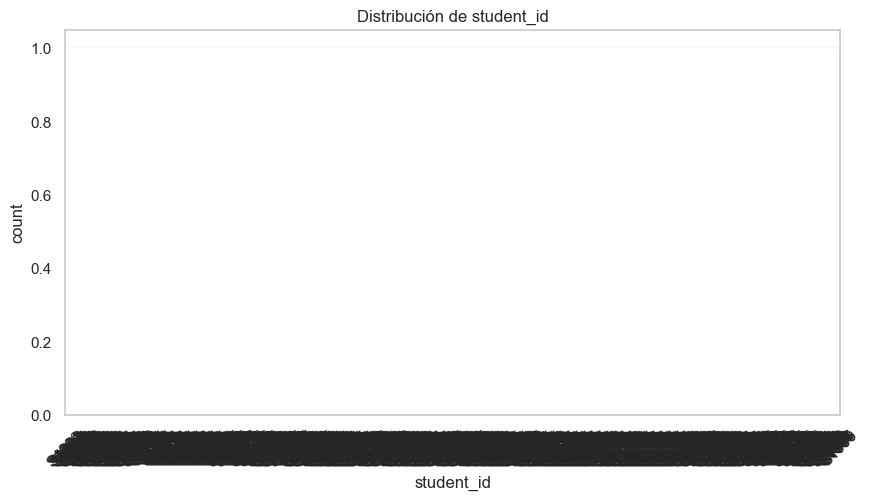

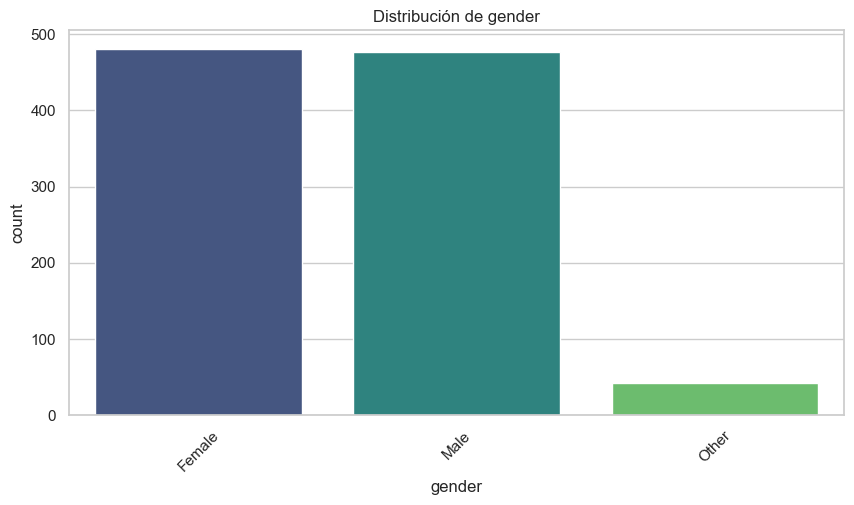

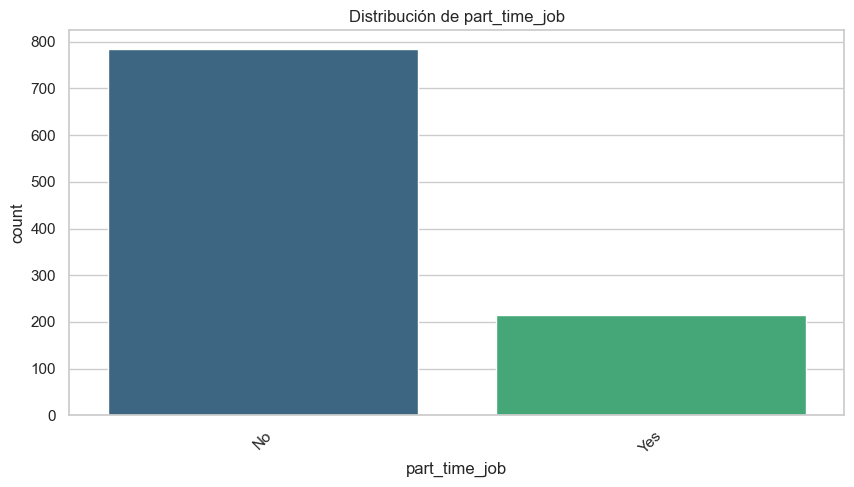

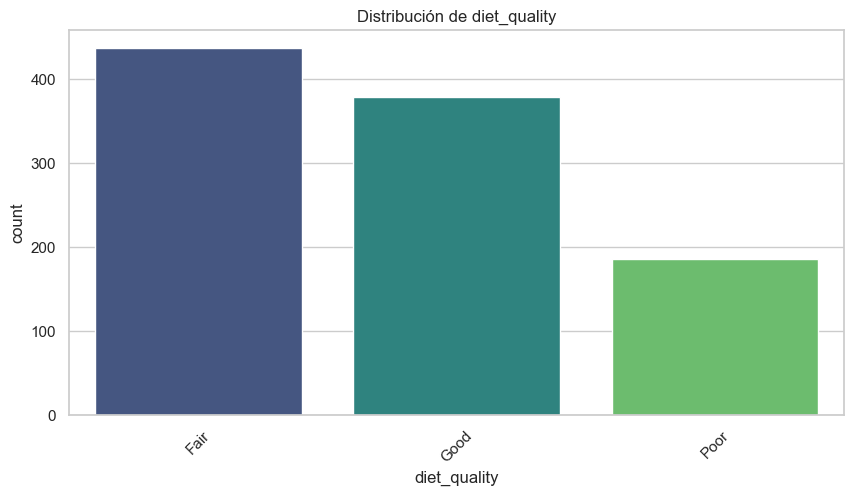

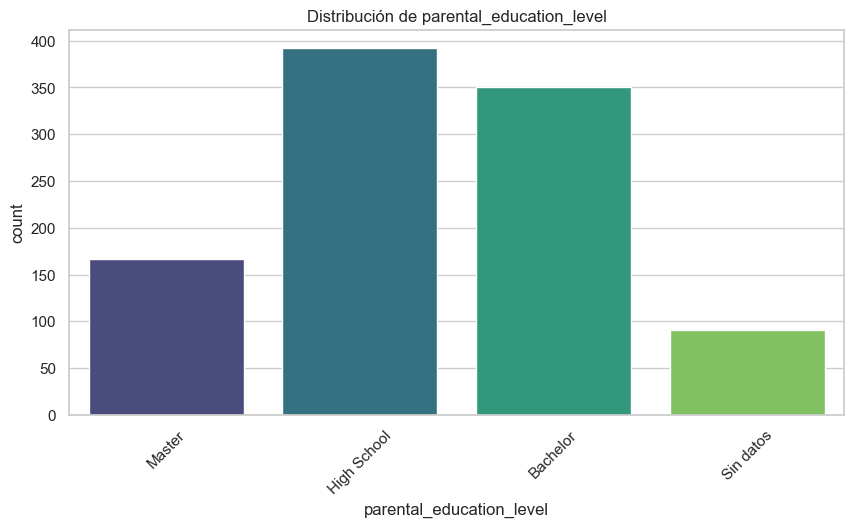

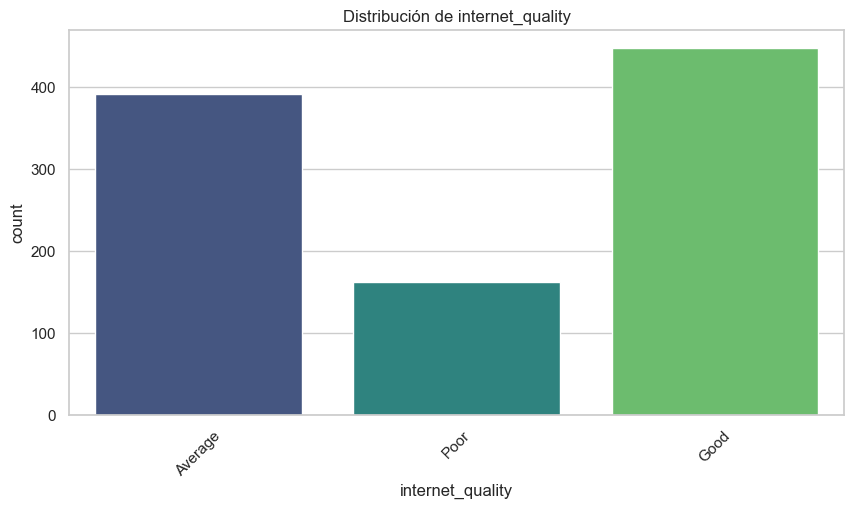

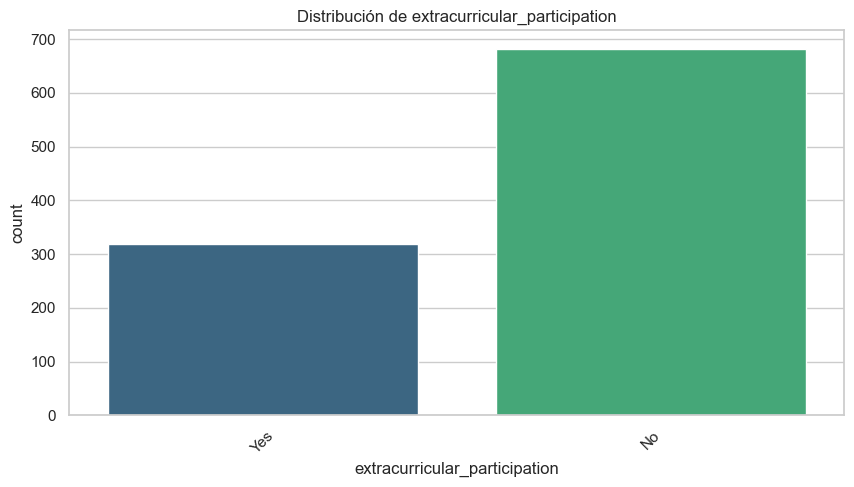

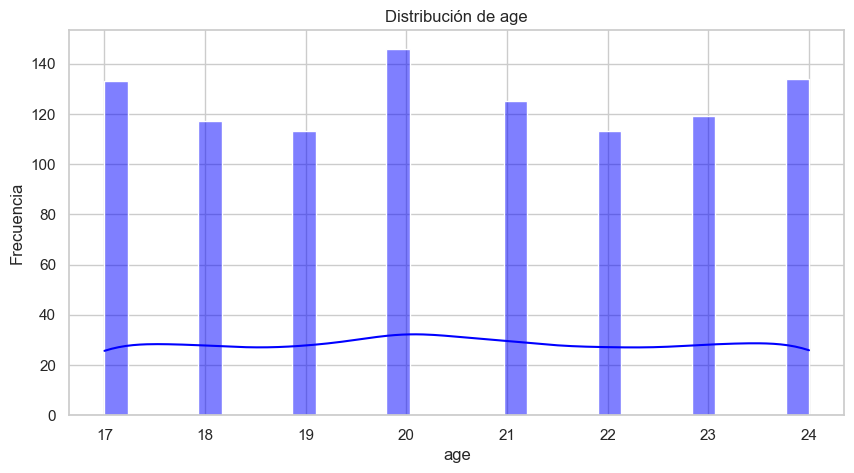

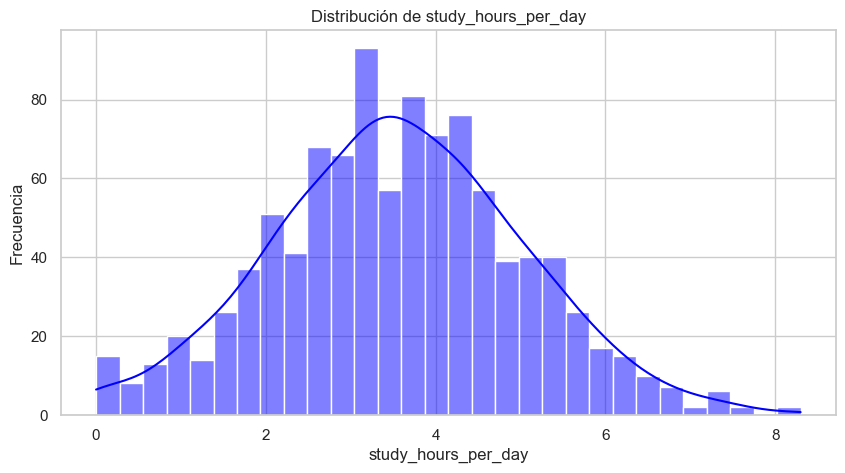

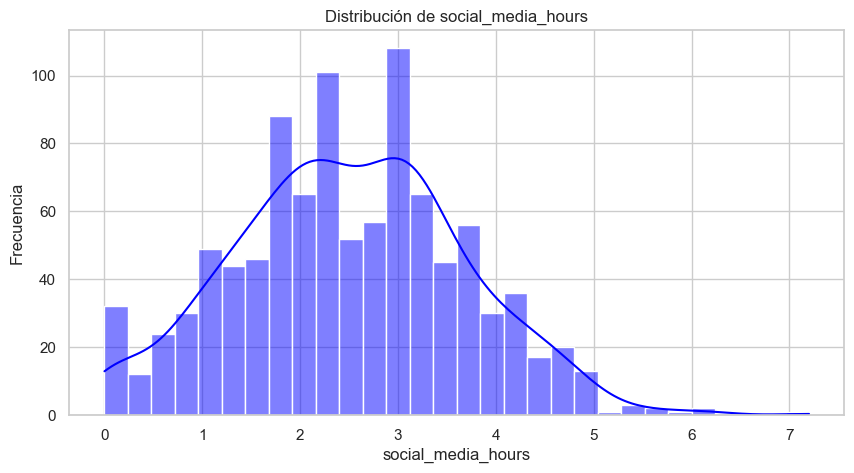

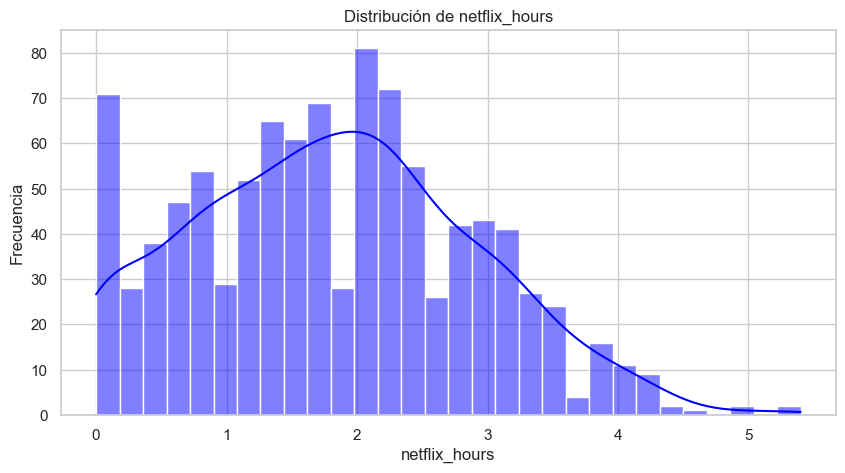

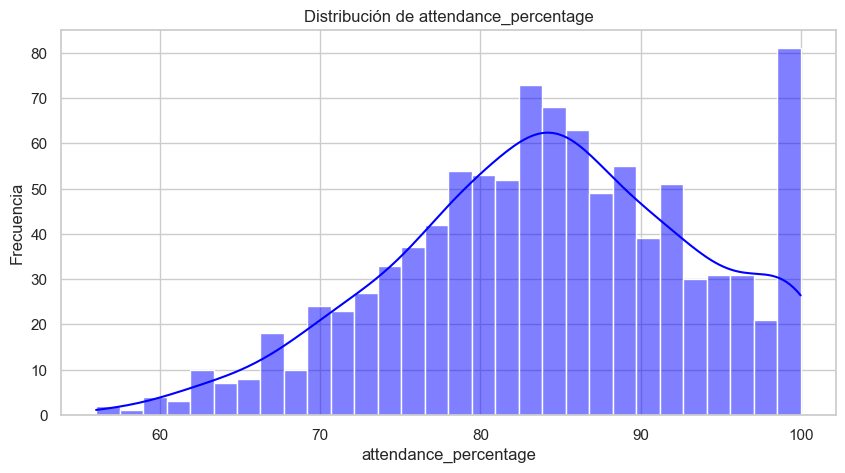

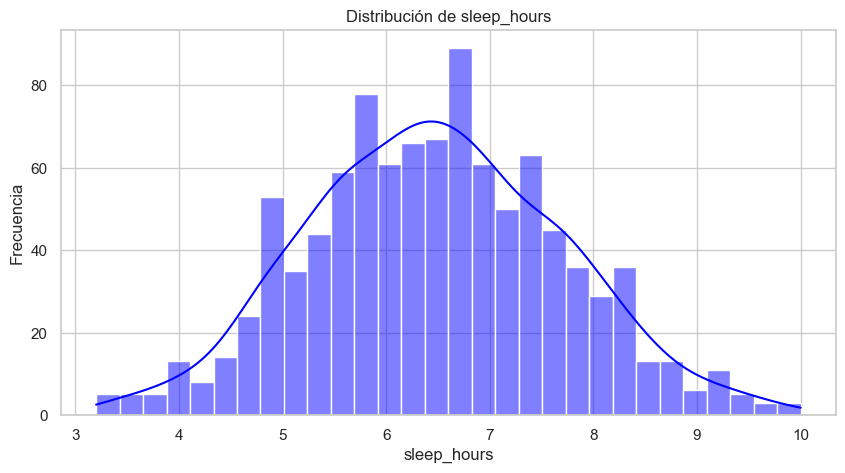

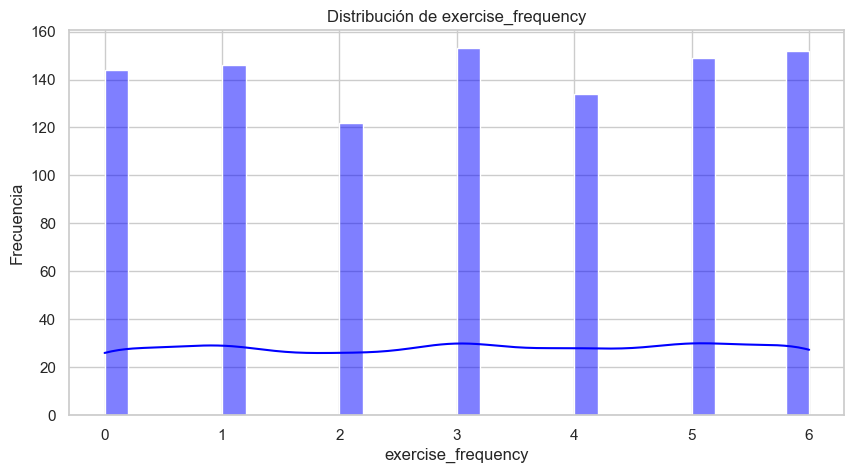

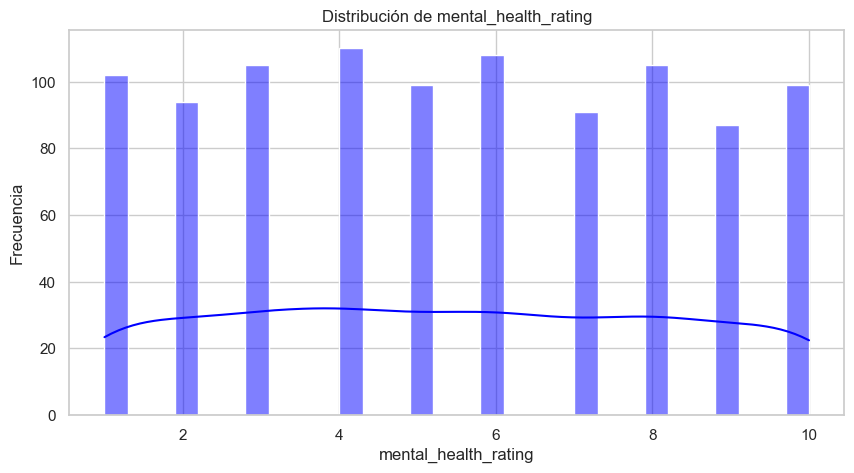

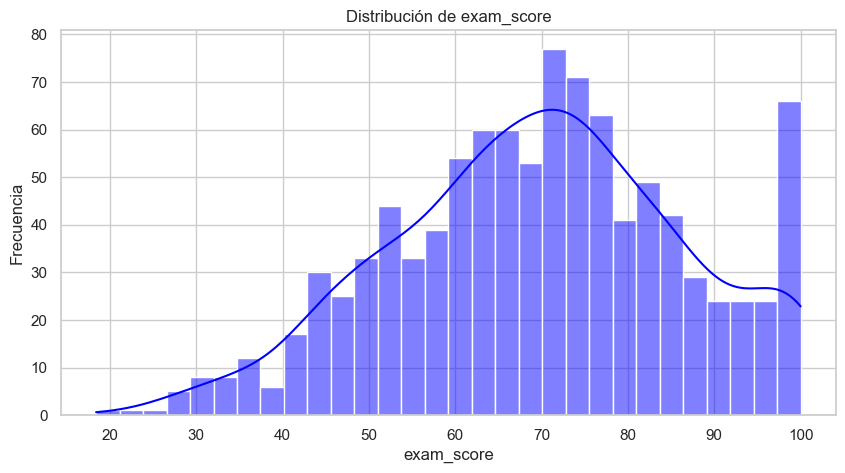

In [30]:
#Creamos varios gráficos que nos ayuden a ver la distribución de los datos y si hay algún outlier en los datos
def plot_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df, col)
for col in numerical_cols:
    plot_numerical_distribution(df, col)

### EDA

### Análisis bivariable

#### Relación entre horas de estudio y calificaciones

In [ ]:
# Agrupamos por horas de estudio y calculamos estadísticas relacionadas con las calificaciones
# Creamos una nueva columna para agrupar las horas de estudio en intervalos de 1 hora
df['study_hours_group'] = pd.cut(df['study_hours_per_day'], bins=range(0, 11), right=False, labels=[f"{i}-{i+1}" for i in range(0, 10)])

# Agrupamos por el nuevo grupo de horas de estudio y calculamos estadísticas relacionadas con las calificaciones
tabla_estudio = df.groupby("study_hours_group")["exam_score"].agg(["count", "mean", "std", "min", "max"])
tabla_estudio = tabla_estudio[["count", "mean"]]  # Seleccionamos solo el número de estudiantes y la nota media
tabla_estudio.columns = ["Estudiantes", "Nota Media"]  # Renombramos las columnas
tabla_estudio = tabla_estudio.sort_index()  # Ordenamos por índice (grupo de horas de estudio)
tabla_estudio  # Mostramos la tabla
    

,Estudiantes,Nota Media
study_hours_group,,
0-1,39,39.225641
1-2,94,48.193617
2-3,201,59.453234
3-4,281,69.200356
4-5,218,78.283945
5-6,114,87.002632
6-7,41,96.814634
7-8,10,99.250000
8-9,2,100.000000


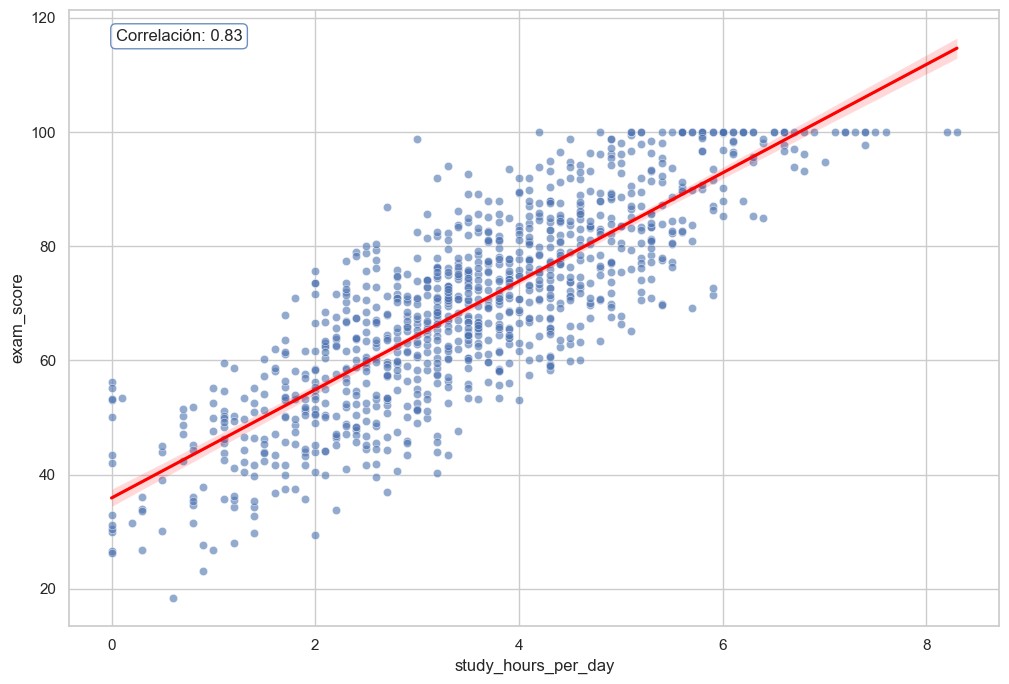

'\nLa función plt.annotate se utiliza para agregar una anotación en el gráfico. \nEl texto de la anotación es una cadena formateada (f\'Correlación: {corr:.2f}\'), \nque incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor \nse calcula previamente con el método .corr() de pandas, que mide la relación lineal \nentre las dos columnas del DataFrame.\n\nEl parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas \nnormalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda \ny (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación \nse coloque en la parte superior izquierda del gráfico, independientemente de los \nvalores de los datos.\n\nEl argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro \ntiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), \nun borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% \n(a

In [53]:
# Relación entre horas de estudio y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de Estudio por Día') 
plt.ylabel('Calificación en Examen')


# línea de regresión
sns.regplot(x='study_hours_per_day', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['study_hours_per_day'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 
'''
La función plt.annotate se utiliza para agregar una anotación en el gráfico. 
El texto de la anotación es una cadena formateada (f'Correlación: {corr:.2f}'), 
que incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor 
se calcula previamente con el método .corr() de pandas, que mide la relación lineal 
entre las dos columnas del DataFrame.

El parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas 
normalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda 
y (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación 
se coloque en la parte superior izquierda del gráfico, independientemente de los 
valores de los datos.

El argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro 
tiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), 
un borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% 
(alpha=0.8). Esto mejora la legibilidad del texto en el gráfico.
'''

#### Relación entre horas en redes sociales y calificaciones

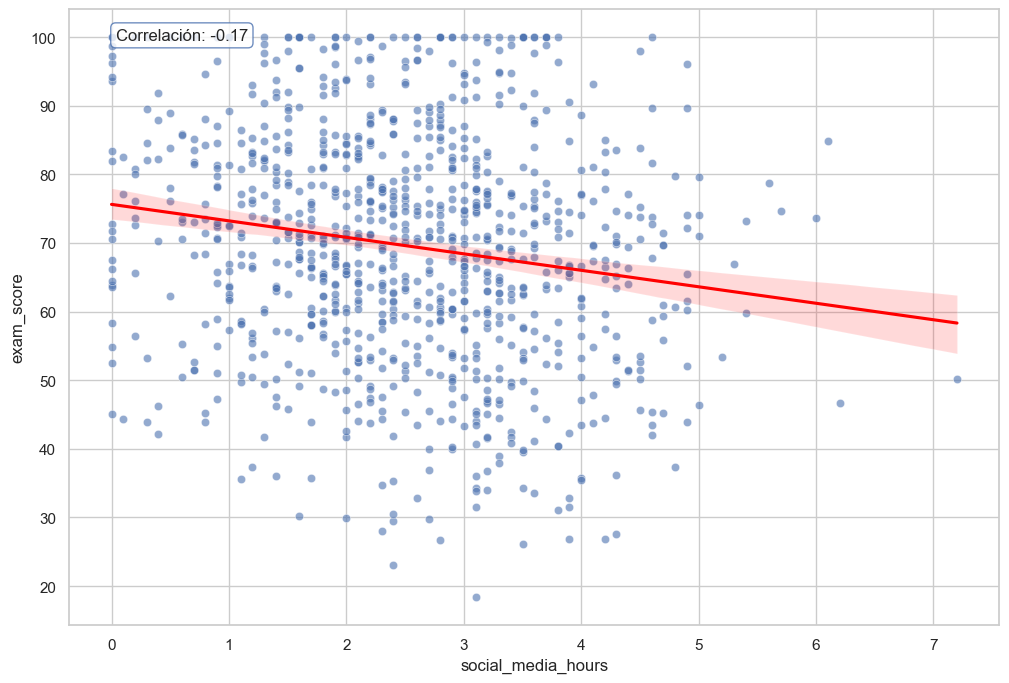

'\nEl resultado del análisis muestra la relación entre las horas dedicadas a redes sociales y las calificaciones en los exámenes. \nEl gráfico de dispersión indica cómo se distribuyen los datos, mientras que la línea de regresión (en rojo) sugiere una tendencia general.\n\nLa correlación calculada (-0.17) indica una relación negativa débil entre las horas en redes sociales y las calificaciones. \nEsto significa que, en general, a medida que aumentan las horas dedicadas a redes sociales, las calificaciones tienden a disminuir ligeramente. \nSin embargo, dado que la correlación es débil, esta relación no es muy fuerte ni determinante.\n\nEste análisis puede ser útil para identificar patrones generales, pero no implica causalidad. \nEs decir, no se puede concluir que pasar más tiempo en redes sociales cause directamente una disminución en las calificaciones.\n'

In [57]:
# Relación entre horas en redes sociales y calificaciones
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, alpha=0.6)  # alpha es la transparencia del punto
plt.xlabel('Horas en Redes Sociales por Día') 
plt.ylabel('Calificación en Examen')

# línea de regresión
sns.regplot(x='social_media_hours', y='exam_score', data=df, scatter=False, color='red')  # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['social_media_hours'].corr(df['exam_score'])  # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8))  # anotamos la correlación en la figura mediante un cuadro 
plt.show()

'''
El resultado del análisis muestra la relación entre las horas dedicadas a redes sociales y las calificaciones en los exámenes. 
El gráfico de dispersión indica cómo se distribuyen los datos, mientras que la línea de regresión (en rojo) sugiere una tendencia general.

La correlación calculada (-0.17) indica una relación negativa débil entre las horas en redes sociales y las calificaciones. 
Esto significa que, en general, a medida que aumentan las horas dedicadas a redes sociales, las calificaciones tienden a disminuir ligeramente. 
Sin embargo, dado que la correlación es débil, esta relación no es muy fuerte ni determinante.

Este análisis puede ser útil para identificar patrones generales, pero no implica causalidad. 
Es decir, no se puede concluir que pasar más tiempo en redes sociales cause directamente una disminución en las calificaciones.
'''


#### Relación entre horas de Netflix y calificaciones

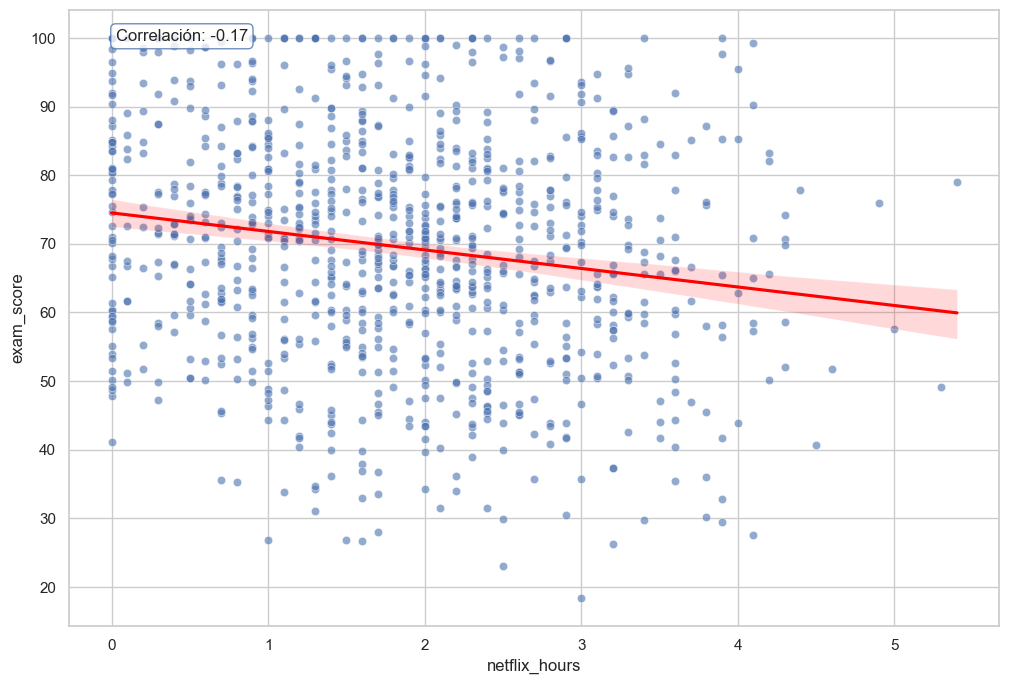

'\nLa correlación calculada (-0.17) indica una relación negativa débil entre las horas de Netflix y las calificaciones. \nEsto significa que, en general, a medida que aumentan las horas dedicadas a Netflix, las calificaciones tienden a disminuir ligeramente. \nSin embargo, dado que la correlación es débil, esta relación no es muy fuerte ni determinante.\n\nEste análisis puede ser útil para identificar patrones generales, pero no implica causalidad. \nEs decir, no se puede concluir que ver más horas de Netflix cause directamente una disminución en las calificaciones.\n'

In [ ]:
# Relación entre horas de Netflix y calificaciones
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.scatterplot(x='netflix_hours', y='exam_score', data=df, alpha=0.6)  # alpha es la transparencia del punto
plt.xlabel('Horas de Netflix por Día') 
plt.ylabel('Calificación en Examen')

# línea de regresión
sns.regplot(x='netflix_hours', y='exam_score', data=df, scatter=False, color='red')  # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['netflix_hours'].corr(df['exam_score'])  # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8))  # anotamos la correlación en la figura mediante un cuadro 
plt.show()

'''
La correlación calculada (-0.17) indica una relación negativa débil entre las horas de Netflix y las calificaciones. 
Esto significa que, en general, a medida que aumentan las horas dedicadas a Netflix, las calificaciones tienden a disminuir ligeramente. 
Sin embargo, dado que la correlación es débil, esta relación no es muy fuerte ni determinante.

Este análisis puede ser útil para identificar patrones generales, pero no implica causalidad. 
Es decir, no se puede concluir que ver más horas de Netflix cause directamente una disminución en las calificaciones.
'''

#### Relación entre horas de sueño y calificaciones

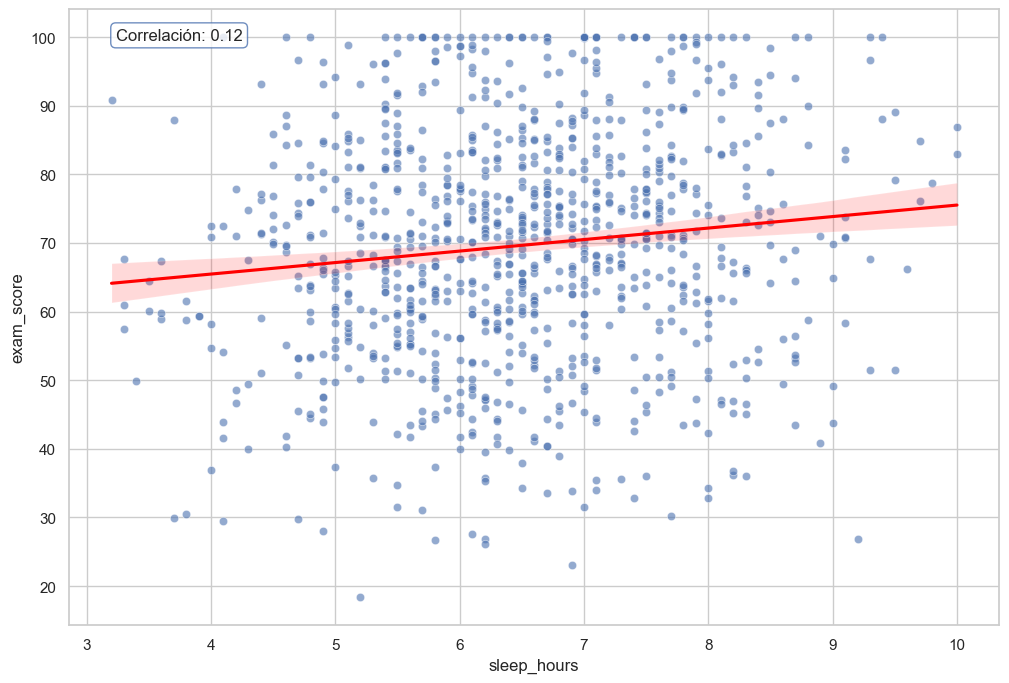

'\nEste análisis muestra la relación entre las horas de sueño y las calificaciones en los exámenes. \nEl gráfico de dispersión indica cómo se distribuyen los datos, mientras que la línea de regresión (en rojo) sugiere una tendencia general.\n\nLa correlación calculada indica la fuerza y dirección de la relación entre las horas de sueño y las calificaciones. \nUn valor positivo sugiere que, en general, más horas de sueño están asociadas con mejores calificaciones.\n'

In [ ]:
# Relación entre horas de sueño y calificaciones
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.scatterplot(x='sleep_hours', y='exam_score', data=df, alpha=0.6)  # alpha es la transparencia del punto
plt.xlabel('Horas de Sueño por Día') 
plt.ylabel('Calificación en Examen')

# línea de regresión
sns.regplot(x='sleep_hours', y='exam_score', data=df, scatter=False, color='red')  # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['sleep_hours'].corr(df['exam_score'])  # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8))  # anotamos la correlación en la figura mediante un cuadro 
plt.show()

'''
La correlación calculada (0.12) indica una relación positiva débil entre las horas de sueño y las calificaciones. 
Esto significa que, en general, a medida que aumentan las horas de sueño, las calificaciones tienden a mejorar ligeramente. 
Sin embargo, dado que la correlación es débil, esta relación no es muy fuerte ni determinante.

Este análisis puede ser útil para identificar patrones generales, pero no implica causalidad. 
Es decir, no se puede concluir que dormir más horas cause directamente una mejora en las calificaciones.
'''


#### Compara calificaciones por género

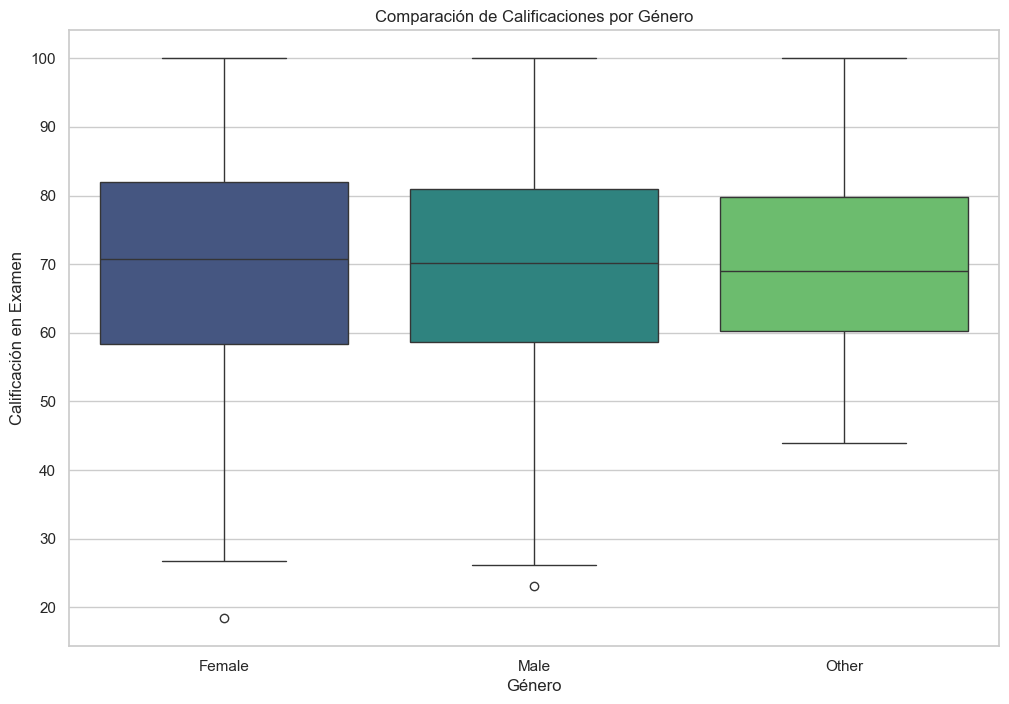

In [ ]:
# Comparación de calificaciones por género
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.boxplot(x='gender', y='exam_score', data=df, palette='viridis')  # gráfico de caja
plt.xlabel('Género') 
plt.ylabel('Calificación en Examen')
plt.title('Comparación de Calificaciones por Género')
plt.show()

'''
El gráfico de cajas muestra la distribución de las calificaciones en los exámenes según el género de los estudiantes. 
Cada caja representa el rango intercuartil (IQR), que abarca el 50% central de los datos, mientras que las líneas horizontales dentro de las cajas indican la mediana. 
Los "bigotes" se extienden hasta los valores más extremos dentro de 1.5 veces el IQR, y los puntos fuera de este rango se consideran valores atípicos.

Este análisis permite comparar visualmente las calificaciones entre géneros y observar si existen diferencias significativas en la distribución de las calificaciones. 
Por ejemplo, si las cajas de diferentes géneros no se superponen mucho, podría indicar diferencias en las calificaciones promedio o en la variabilidad de las mismas. 
Sin embargo, para confirmar diferencias significativas, sería necesario realizar pruebas estadísticas adicionales.
'''


#### Compara calificaciones por trabajo de medio tiempo

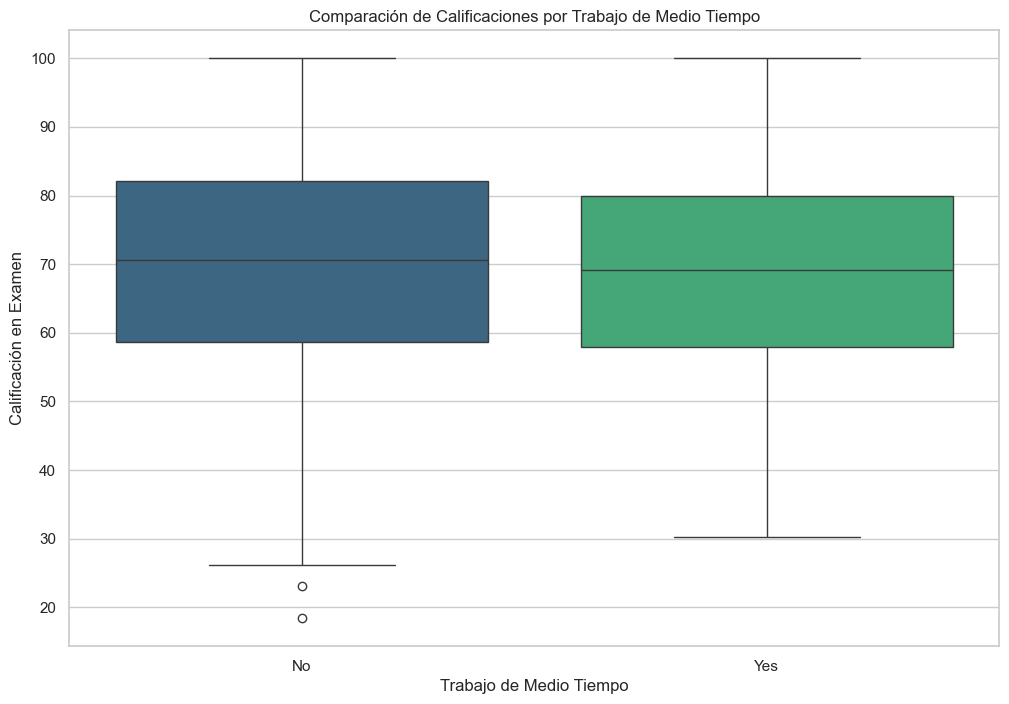

'\nEl gráfico de cajas muestra cómo las calificaciones en los exámenes varían según si los estudiantes tienen o no un trabajo de medio tiempo. \n\nCada caja representa la distribución de las calificaciones para cada grupo (con o sin trabajo). La línea dentro de la caja indica la mediana, mientras que los "bigotes" muestran el rango de valores típicos. Los puntos fuera de los bigotes son valores atípicos.\n\nEste análisis permite observar si tener un trabajo de medio tiempo afecta las calificaciones. Si las cajas son similares, podría indicar que no hay una diferencia significativa. Para confirmar esto, sería necesario realizar pruebas estadísticas adicionales.\n'

In [77]:
# Comparación de calificaciones por trabajo de medio tiempo
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.boxplot(x='part_time_job', y='exam_score', data=df, palette='viridis')  # gráfico de caja
plt.xlabel('Trabajo de Medio Tiempo') 
plt.ylabel('Calificación en Examen')
plt.title('Comparación de Calificaciones por Trabajo de Medio Tiempo')
plt.show()

'''
El gráfico de cajas muestra cómo las calificaciones en los exámenes varían según si los estudiantes tienen o no un trabajo de medio tiempo. 

Cada caja representa la distribución de las calificaciones para cada grupo (con o sin trabajo). La línea dentro de la caja indica la mediana, mientras que los "bigotes" muestran el rango de valores típicos. Los puntos fuera de los bigotes son valores atípicos.

Este análisis permite observar si tener un trabajo de medio tiempo afecta las calificaciones. Si las cajas son similares, podría indicar que no hay una diferencia significativa. Para confirmar esto, sería necesario realizar pruebas estadísticas adicionales.
'''


#### Compara calificaciones por calidad de dieta

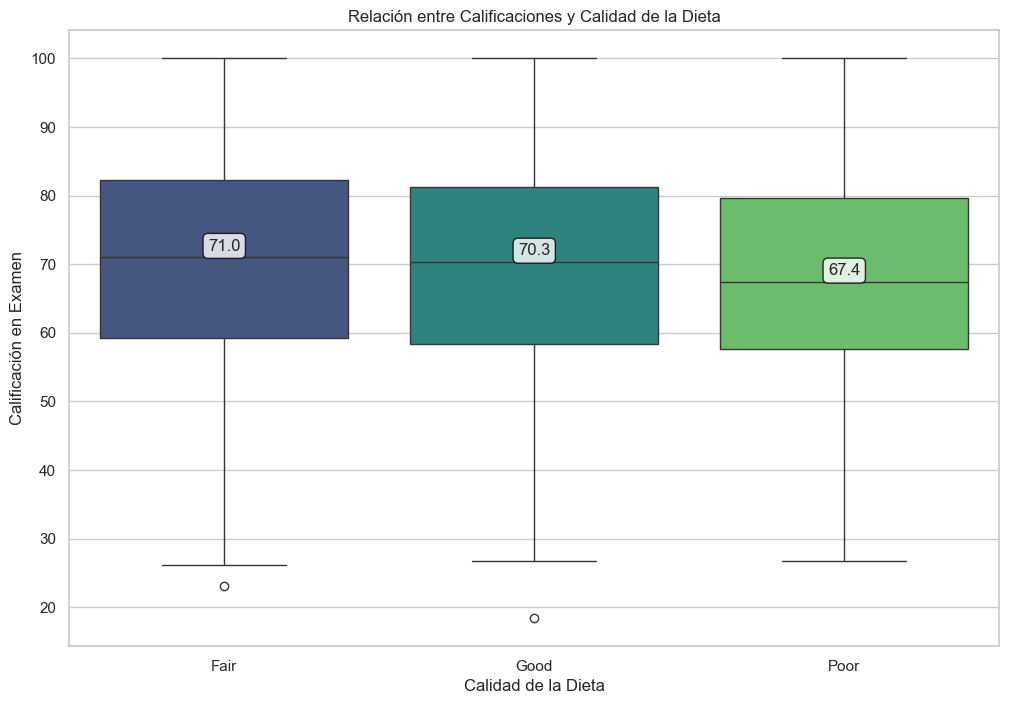

' \nEl gráfico de cajas muestra cómo las calificaciones en los exámenes varían según la calidad de la dieta de los estudiantes.\n\nLas medianas son similares entre las tres categorías ("Fair", "Good" y "Poor"), todas alrededor de 70, por lo que no parece haber una diferencia significativa entre ellas.\nLa calidad de la dieta no muestra una diferencia clara o fuerte en las calificaciones del examen.\n'

In [73]:
# Relación entre calificaciones y calidad de la dieta
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.boxplot(x='diet_quality', y='exam_score', data=df, palette='viridis')  # gráfico de caja
plt.xlabel('Calidad de la Dieta') 
plt.ylabel('Calificación en Examen')
plt.title('Relación entre Calificaciones y Calidad de la Dieta')

# Añadimos un cuadro que muestre la mediana de cada categoría
medianas = df.groupby('diet_quality')['exam_score'].median()
for i, median in enumerate(medianas):
    plt.text(i, median + 1, f'{median:.1f}', ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=0.8))

plt.show()

''' 
El gráfico de cajas muestra cómo las calificaciones en los exámenes varían según la calidad de la dieta de los estudiantes.

Las medianas son similares entre las tres categorías ("Fair", "Good" y "Poor"), todas alrededor de 70, por lo que no parece haber una diferencia significativa entre ellas.
La calidad de la dieta no muestra una diferencia clara o fuerte en las calificaciones del examen.
'''

#### Compara calificaciones por participación extracurricular

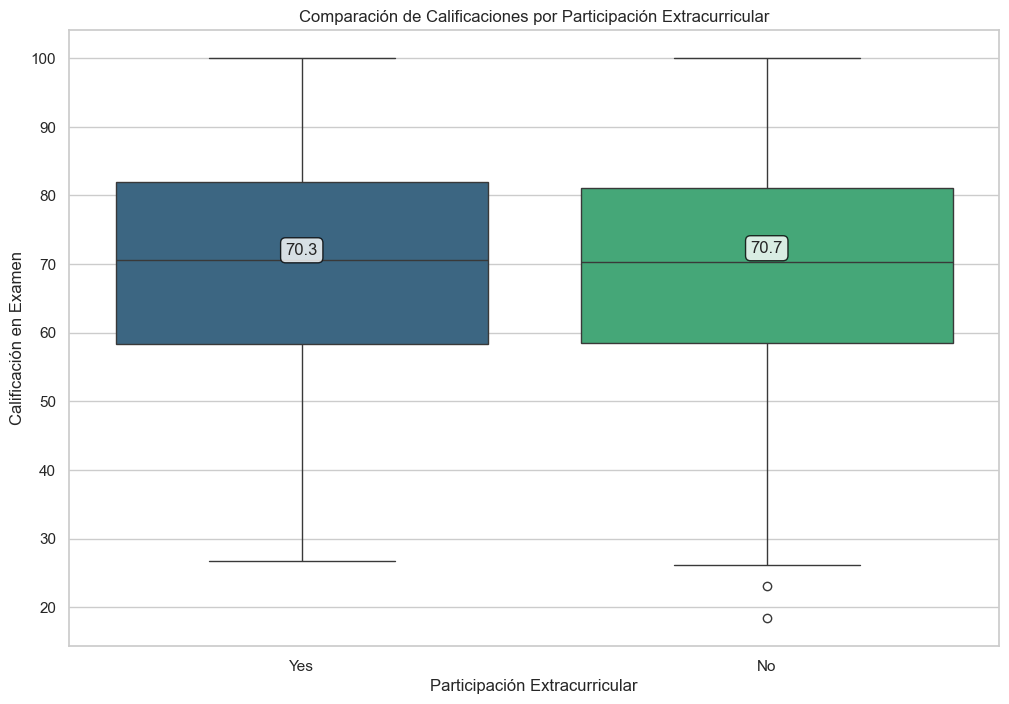

'\nEl gráfico de cajas muestra cómo las calificaciones en los exámenes varían según si los estudiantes participan o no en actividades extracurriculares.\n\nCada caja representa la distribución de las calificaciones para cada grupo (con o sin participación extracurricular). La línea dentro de la caja indica la mediana, mientras que los "bigotes" muestran el rango de valores típicos. Los puntos fuera de los bigotes son valores atípicos.\n\nLas medianas son similares entre los estudiantes con o sin participación extracurricular. por lo que no parece que la participación extracurricular tenga un impacto significativo en las calificaciones del examen.\n'

In [75]:
# Comparación de calificaciones por participación extracurricular
plt.figure(figsize=(12, 8))  # configuramos el tamaño de la figura
sns.boxplot(x='extracurricular_participation', y='exam_score', data=df, palette='viridis')  # gráfico de caja
plt.xlabel('Participación Extracurricular') 
plt.ylabel('Calificación en Examen')
plt.title('Comparación de Calificaciones por Participación Extracurricular')

# Añadimos un cuadro que muestre la mediana de cada categoría
medianas = df.groupby('extracurricular_participation')['exam_score'].median()
for i, median in enumerate(medianas):
    plt.text(i, median + 1, f'{median:.1f}', ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=0.8))

plt.show()

'''
El gráfico de cajas muestra cómo las calificaciones en los exámenes varían según si los estudiantes participan o no en actividades extracurriculares.

Cada caja representa la distribución de las calificaciones para cada grupo (con o sin participación extracurricular). La línea dentro de la caja indica la mediana, mientras que los "bigotes" muestran el rango de valores típicos. Los puntos fuera de los bigotes son valores atípicos.

Las medianas son similares entre los estudiantes con o sin participación extracurricular. por lo que no parece que la participación extracurricular tenga un impacto significativo en las calificaciones del examen.
'''


### Correlación

<Axes: >

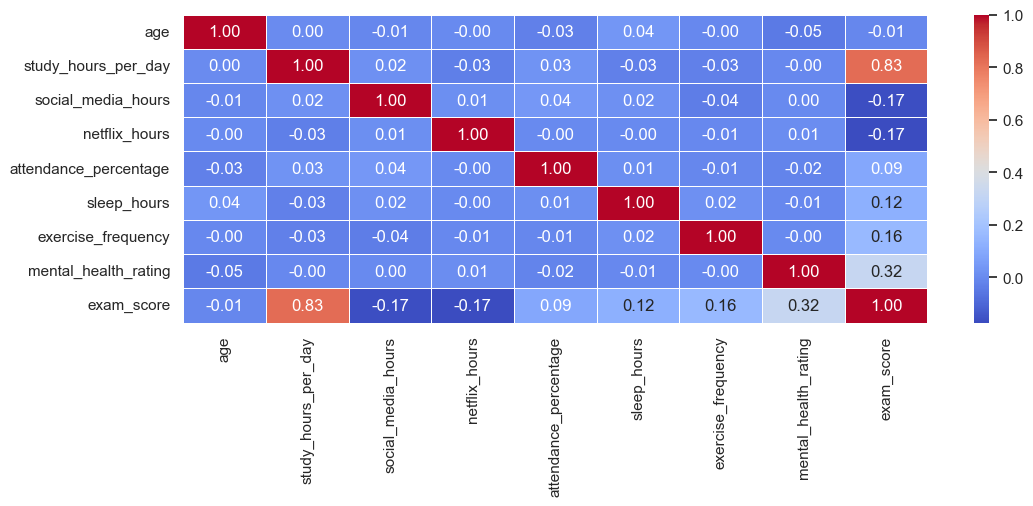

In [78]:
var_num = df.select_dtypes(include=[np.number]).columns.tolist()
sns.heatmap(df[var_num].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
 

### Análisis multivariable o multivariado

#### Análisis por grupos: calidad de dieta y horas de estudio vs calificaciones

#### Análisis por grupos: participación extracurricular y horas de estudio vs calificaciones

#### Análisis por grupos: horas de sueño, salud mental y calificaciones